In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report


In [4]:
# Step 2: Load Dataset
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [5]:
# Step 3: Handle Missing Values
print(df.isnull().sum())
df = df.dropna()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64


In [6]:
# Step 4: Encode Categorical Variables
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [7]:
# Step 5: Normalize Numeric Columns

scaler = StandardScaler()
df[['Distance', 'Delivery_Time', 'Order_Cost']] = scaler.fit_transform(df[['Distance', 'Delivery_Time', 'Order_Cost']])

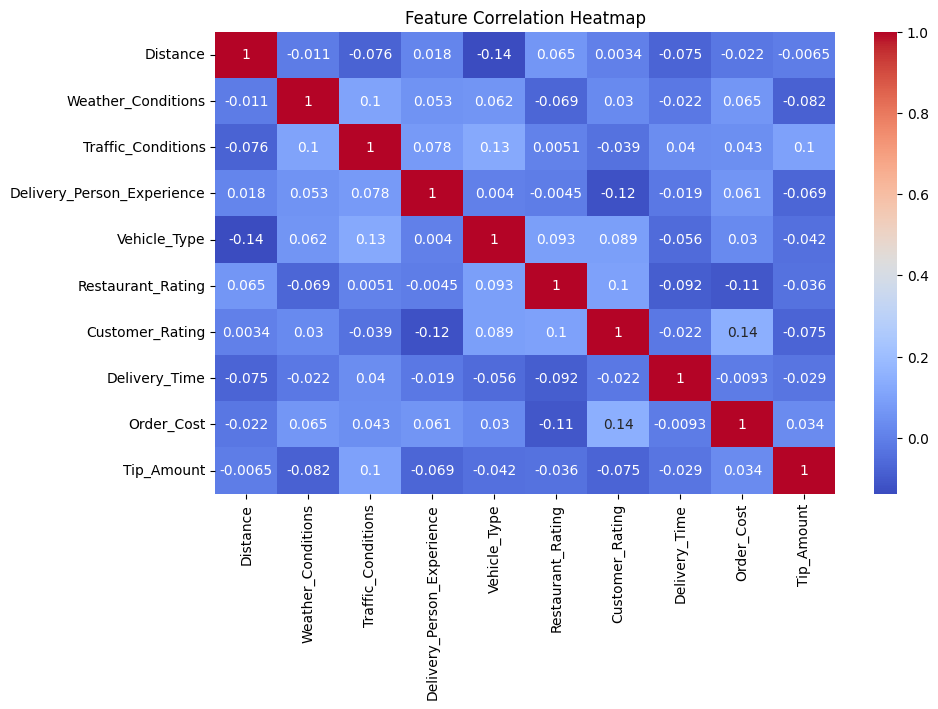

In [8]:
# Step 6: Correlation Heatmap

# 🔹 Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# 🔹 Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

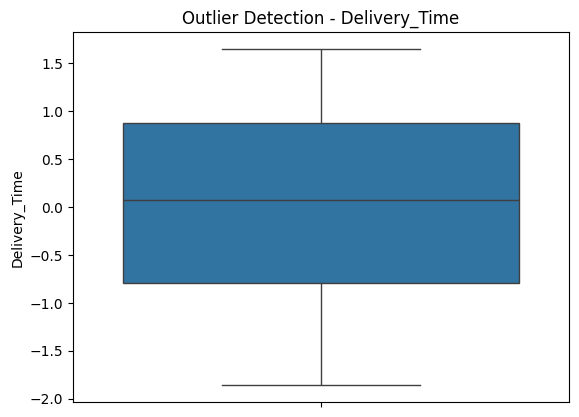

In [9]:
# Step 7: Outlier Detection
sns.boxplot(df['Delivery_Time'])
plt.title("Outlier Detection - Delivery_Time")
plt.show()


In [10]:
# Step 8: Linear Regression Model
X = df[['Distance', 'Traffic_Conditions', 'Weather_Conditions', 'Order_Cost']]
y = df['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression Evaluation:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression Evaluation:
MSE: 1.0493992701196895
MAE: 0.8538133801286276
R² Score: -0.00461558206239121


In [11]:
# Step 9: Logistic Regression Model
df['Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > df['Delivery_Time'].median() else 0)
X_class = df[['Distance', 'Traffic_Conditions', 'Weather_Conditions', 'Delivery_Person_Experience']]
y_class = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred_class = logr.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))


[[ 6 13]
 [ 7 14]]
              precision    recall  f1-score   support

           0       0.46      0.32      0.38        19
           1       0.52      0.67      0.58        21

    accuracy                           0.50        40
   macro avg       0.49      0.49      0.48        40
weighted avg       0.49      0.50      0.48        40

